In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Overall mean accuracy (p=1..4, q=1..8): 0.5250
Overall mean weighted F1 (p=1..4, q=1..8): 0.5106

Per-p mean accuracy:
p
1    0.5275
2    0.5462
3    0.5250
4    0.5012
Name: accuracy, dtype: float64

Per-p mean weighted F1:
p
1    0.5088
2    0.5337
3    0.5125
4    0.4875
Name: weighted_f1, dtype: float64


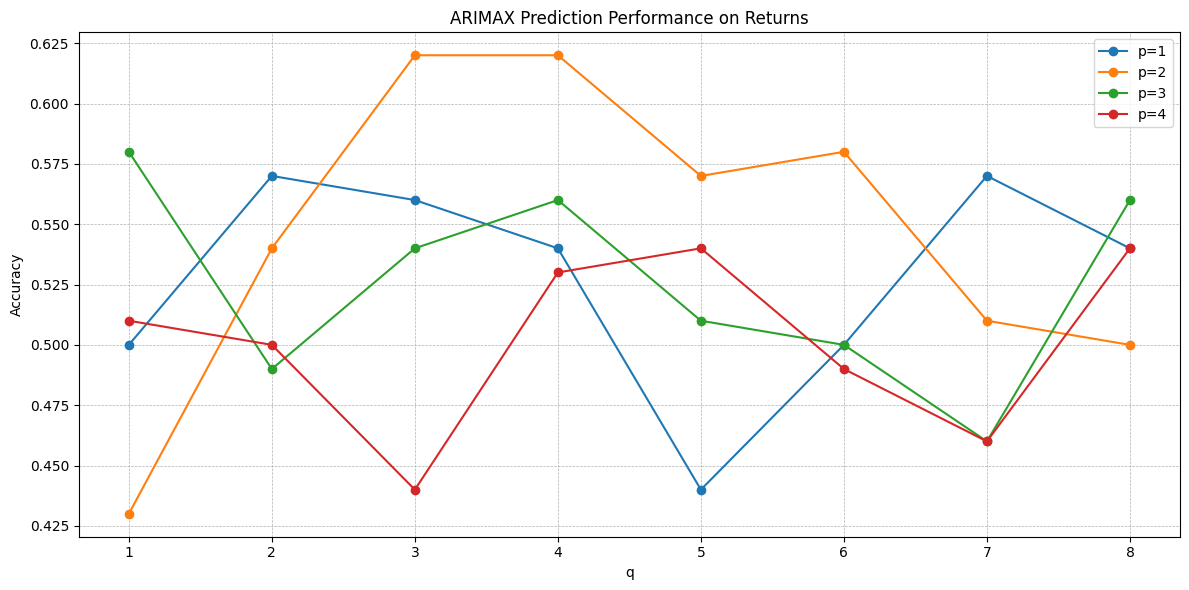

In [6]:
# --- Config ---
path = "/content/drive/MyDrive/CS526_DS_Group/Numeric Model/datasets/ARIMAX_returns_performance.csv"  # update if needed

# --- Load ---
df = pd.read_csv(path)

# Normalize column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Pick columns (adjust if your headers differ)
p_col = "p"
q_col = "q"
acc_col = "accuracy"
f1_col = "weighted_f1"  # adjust if your file uses a different name

# Ensure numeric types and drop missing
for c in [p_col, q_col, acc_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- Filter to p in [1, 4] ---
df = df[(df[p_col] >= 1) & (df[p_col] <= 4) & (df[q_col] >= 1) & (df[q_col] <= 8)]

plot_df = df.dropna(subset=[p_col, q_col, acc_col]).copy()
plot_df.sort_values([p_col, q_col], inplace=True)


# === Averages (overall) ===
avg_accuracy = plot_df[acc_col].mean()
avg_f1 = plot_df[f1_col].mean()
print(f"Overall mean accuracy (p=1..4, q=1..8): {avg_accuracy:.4f}")
print(f"Overall mean weighted F1 (p=1..4, q=1..8): {avg_f1:.4f}")

# === (Optional) per-p averages ===
per_p_avg_acc = plot_df.groupby(p_col)[acc_col].mean().sort_index()
per_p_avg_f1 = plot_df.groupby(p_col)[f1_col].mean().sort_index()

print("\nPer-p mean accuracy:")
print(per_p_avg_acc.round(4))
print("\nPer-p mean weighted F1:")
print(per_p_avg_f1.round(4))

# --- Plot: x = q, y = accuracy; one line per p ---
plt.figure(figsize=(12, 6))
for p_value, g in plot_df.groupby(p_col):
    g = g.sort_values(q_col)
    plt.plot(g[q_col], g[acc_col], marker="o", label=f"p={int(p_value)}")

plt.xlabel("q")
plt.ylabel("Accuracy")
plt.title("ARIMAX Prediction Performance on Returns")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Optional: save the figure
# plt.savefig("accuracy_vs_q_by_p.png", dpi=200)


Overall mean accuracy (p=1..4, q=1..8): 0.4263
Overall mean weighted F1 (p=1..4, q=1..8): 0.4256

Per-p mean accuracy:
p
1    0.4188
2    0.4288
3    0.4350
4    0.4225
Name: accuracy, dtype: float64

Per-p mean weighted F1:
p
1    0.4175
2    0.4288
3    0.4350
4    0.4212
Name: weighted_f1, dtype: float64


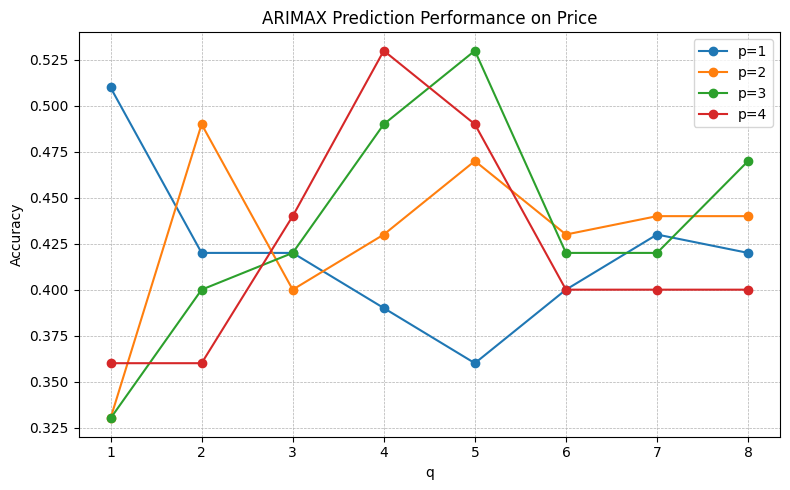

In [5]:
# --- Config ---
path = "/content/drive/MyDrive/CS526_DS_Group/Numeric Model/datasets/ARIMAX_performance_on_price.csv"  # update if needed

# --- Load ---
df = pd.read_csv(path)

# Normalize column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Pick columns (adjust if your headers differ)
p_col = "p"
q_col = "q"
acc_col = "accuracy"
f1_col = "weighted_f1"  # adjust if your file uses a different name

# Ensure numeric types and drop missing
for c in [p_col, q_col, acc_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- Filter to p in [1, 4] ---
df = df[(df[p_col] >= 1) & (df[p_col] <= 4) & (df[q_col] >= 1) & (df[q_col] <= 8)]

plot_df = df.dropna(subset=[p_col, q_col, acc_col]).copy()
plot_df.sort_values([p_col, q_col], inplace=True)


# === Averages (overall) ===
avg_accuracy = plot_df[acc_col].mean()
avg_f1 = plot_df[f1_col].mean()
print(f"Overall mean accuracy (p=1..4, q=1..8): {avg_accuracy:.4f}")
print(f"Overall mean weighted F1 (p=1..4, q=1..8): {avg_f1:.4f}")

# === (Optional) per-p averages ===
per_p_avg_acc = plot_df.groupby(p_col)[acc_col].mean().sort_index()
per_p_avg_f1 = plot_df.groupby(p_col)[f1_col].mean().sort_index()

print("\nPer-p mean accuracy:")
print(per_p_avg_acc.round(4))
print("\nPer-p mean weighted F1:")
print(per_p_avg_f1.round(4))

# --- Plot: x = q, y = accuracy; one line per p ---
plt.figure(figsize=(8, 5))
for p_value, g in plot_df.groupby(p_col):
    g = g.sort_values(q_col)
    plt.plot(g[q_col], g[acc_col], marker="o", label=f"p={int(p_value)}")

plt.xlabel("q")
plt.ylabel("Accuracy")
plt.title("ARIMAX Prediction Performance on Price")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Optional: save the figure
# plt.savefig("accuracy_vs_q_by_p.png", dpi=200)
